In [19]:
conda install -c conda-forge plotnine

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - plotnine


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.10.3               |   py37hf985489_0         3.0 MB  conda-forge
    descartes-1.1.0            |             py_4           7 KB  conda-forge
    matplotlib-base-3.1.1      |   py37h3a684a6_1         6.6 MB  conda-forge
    mizani-0.7.0               |             py_0          52 KB  conda-forge
    palettable-3.3.0           |             py_0          86 KB  conda-forge
    plotnine-0.6.0             |             py_1         3.4 MB  

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
%matplotlib inline

In [24]:
listings = pd.read_csv("../data/listings.csv")
prices = pd.read_csv("../data/stock_prices.csv")
volumes = pd.read_csv("../data/stock_volumes.csv")
market_caps = pd.read_csv("../data/stock_mktcaps.csv").set_index("date")

In [25]:
missing = market_caps.isna().sum()
for i in missing.index:    
    if missing[i] >= 1:
        market_caps = market_caps.drop(columns=[i])

In [26]:
market_caps

,930060,699903,879841,314909,15362F,315452,884570,992762,879650,315449,...,687286,936980,361367,152198,871347,362603,502585,152288,779661,317449
date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,2658.66,547.34,674.37,20901.61,392.39,268.07,1983.24,2784.07,483.04,1585.67,...,155.26,2240.00,16.35,26.20,53.90,214.82,20.54,14.10,2835.91,1195.35
2003-01-03,2679.51,547.34,674.37,21305.57,388.42,268.07,1937.44,2858.64,483.04,1609.16,...,161.01,2240.00,16.35,26.20,53.90,214.82,20.54,14.10,2855.47,1195.35
2003-01-06,2669.09,547.34,674.37,21729.07,388.42,270.19,1937.44,2982.93,483.04,1609.16,...,155.26,2240.00,16.35,18.71,53.90,240.75,20.54,14.10,2865.25,1195.35
2003-01-07,2658.66,547.34,668.55,23129.91,388.42,270.19,1937.44,3082.36,483.04,1585.67,...,149.51,2240.00,19.32,18.71,53.90,240.75,20.54,14.10,2884.80,1195.35
2003-01-08,2658.66,547.34,668.55,22308.95,388.42,270.19,1937.44,3057.51,483.04,1550.43,...,143.76,2240.00,19.32,18.71,53.90,240.75,20.65,14.10,2894.58,1157.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,10915.28,86.36,760.07,113598.50,13739.52,659.73,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1680.98,132.46,2873.02,1431.21,622.73,2599.43,37927.40,21410.80
2021-06-25,10884.50,86.36,760.07,114861.70,13739.52,661.93,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1715.28,132.46,2873.02,1374.83,622.73,2530.42,37405.35,21212.56
2021-06-28,10736.07,86.36,760.07,111606.30,13739.52,625.64,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1654.02,132.46,2873.02,1379.17,622.73,2530.42,37146.55,21225.77


In [27]:
features = list(market_caps.columns)

In [28]:
X = market_caps[features]
z = StandardScaler()

#z scores all features (normalization)
X[features] = z.fit_transform(X)

#n_components is arbitrary, should try other n number of clusters
EM = GaussianMixture(n_components=5)
EM.fit(X)

cluster = EM.predict(X)

#Using probablistic cluster (gives probability of data being in their respective cluster)
#cluster_p = EM.predict_proba(X)

#Silhouette score is a metric used to measure how "good" a clustering technique is (ranges from -1 to 1)
print("Silhouette: ",silhouette_score(X,cluster))

X["cluster"] = cluster


Silhouette:  0.3392930772227134


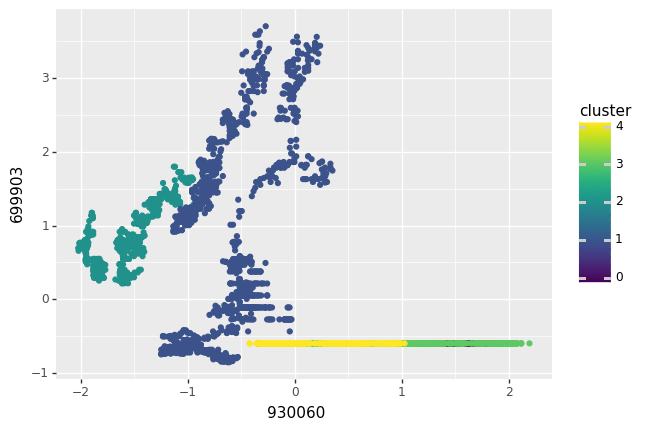

<ggplot: (7019251209)>

In [29]:
(ggplot(X, aes(x = "930060", y="699903", color="cluster")) +geom_point())